In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read dataset
col_names = ["sepal_length", "sepal_width", "petal_length","petal_width","flower_class"]
iris = pd.read_csv('iris.data', names=col_names)

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,flower_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

# No null values , datatypes are as expected 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
flower_class    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


flower_class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

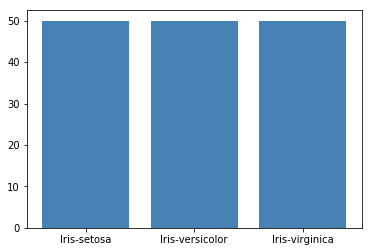

In [8]:
#Checking class wise distribution 

cat_counts = iris.groupby(['flower_class']).size()
data_distri = plt.bar(cat_counts.index, cat_counts.values, color='steelblue', label='Number of flowers')
plt.savefig('data_distri.png')

#Sufficient data points available for all classes of flowers

### Examining the distinctiveness of different Iris flower classes 

In [6]:
import scipy.stats as stats
#Null hypothesis, H0 =  mean of feature is same for all three flower types 
#Alternate hypothesis, H1 = mean of feature is not same for all three flower types

In [7]:
sep_l_setosa  = iris.sepal_length[iris.flower_class=='Iris-setosa']
sep_l_versi= iris.sepal_length[iris.flower_class=='Iris-versicolor']
sep_l_virgini= iris.sepal_length[iris.flower_class=='Iris-virginica']
stats.f_oneway(sep_l_setosa,sep_l_versi, sep_l_virgini)

#Null hypothesis is rejected

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [8]:
sep_w_setosa  = iris.sepal_width[iris.flower_class=='Iris-setosa']
sep_w_versi= iris.sepal_width[iris.flower_class=='Iris-versicolor']
sep_w_virgini= iris.sepal_width[iris.flower_class=='Iris-virginica']
stats.f_oneway(sep_w_setosa,sep_w_versi, sep_w_virgini)

#Null hypothesis is rejected

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

In [9]:
pet_l_setosa  = iris.petal_length[iris.flower_class=='Iris-setosa']
pet_l_versi= iris.petal_length[iris.flower_class=='Iris-versicolor']
pet_l_virgini= iris.petal_length[iris.flower_class=='Iris-virginica']
stats.f_oneway(pet_l_setosa,pet_l_versi, pet_l_virgini)

#Null hypothesis is rejected

F_onewayResult(statistic=1179.0343277002194, pvalue=3.0519758018278374e-91)

In [10]:
pet_w_setosa  = iris.petal_width[iris.flower_class=='Iris-setosa']
pet_w_versi= iris.petal_width[iris.flower_class=='Iris-versicolor']
pet_w_virgini= iris.petal_width[iris.flower_class=='Iris-virginica']
stats.f_oneway(pet_w_setosa,pet_w_versi, pet_w_virgini)

#Null hypothesis is rejected

F_onewayResult(statistic=959.3244057257613, pvalue=4.376956957488959e-85)

In [11]:
iris.groupby(['flower_class']).mean()

,sepal_length,sepal_width,petal_length,petal_width
flower_class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [12]:
iris.groupby(['flower_class']).describe().T

flower_class        Iris-setosa  Iris-versicolor  Iris-virginica
petal_length count    50.000000        50.000000       50.000000
             mean      1.464000         4.260000        5.552000
             std       0.173511         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.575000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    50.000000        50.000000       50.000000
             mean      0.244000         1.326000        2.026000
             std       0.107210         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000
sepal_length count    50.000000        50.000000       50.000000
             mean      5.006000         5.936000        6.588000
             std       0.352490         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    50.000000        50.000000       50.000000
             mean      3.418000         2.770000        2.974000
             std       0.381024         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.125000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.675000         3.000000        3.175000
             max       4.400000         3.400000        3.800000

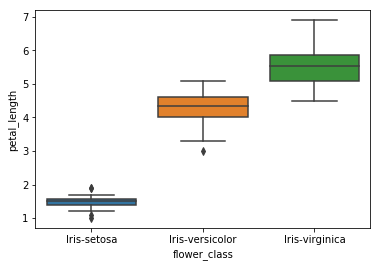

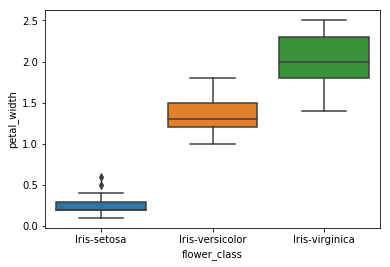

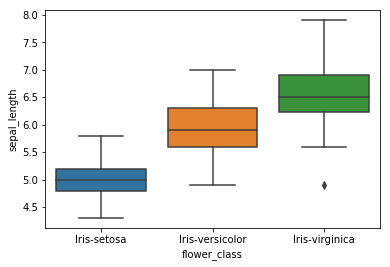

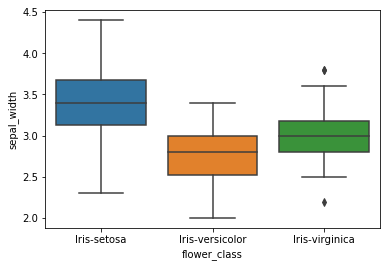

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['blue','orange','green']
j=0
for i in iris.columns.difference(['flower_class']):
  
    fig,axes = plt.subplots(figsize=(6,4))
    sns.boxplot(x=iris['flower_class'],y=i, data = iris)
    plt.savefig(i)  
plt.show() 

<Figure size 432x288 with 0 Axes>

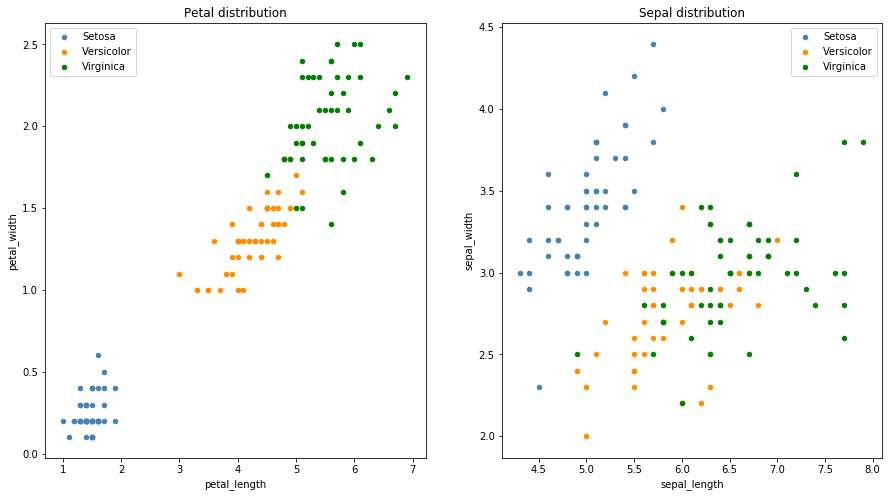

In [14]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(15, 8))

iris[iris['flower_class']=='Iris-setosa'].plot(kind='scatter',x='petal_length',y='petal_width',ax=ax[0],color='steelblue',title='Petal distribution', label='Setosa')
iris[iris['flower_class']=='Iris-versicolor'].plot(kind='scatter',x='petal_length',y='petal_width',ax=ax[0],color='darkorange',label='Versicolor')
iris[iris['flower_class']=='Iris-virginica'].plot(kind='scatter',x='petal_length',y='petal_width',ax=ax[0],color='green',label='Virginica')

iris[iris['flower_class']=='Iris-setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',ax=ax[1],color='steelblue', title='Sepal distribution', label='Setosa')
iris[iris['flower_class']=='Iris-versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',ax=ax[1],color='darkorange', label='Versicolor')
iris[iris['flower_class']=='Iris-virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',ax=ax[1],color='green',label='Virginica')

#plt.savefig('scatter.pdf') 
plt.show()
plt.close()


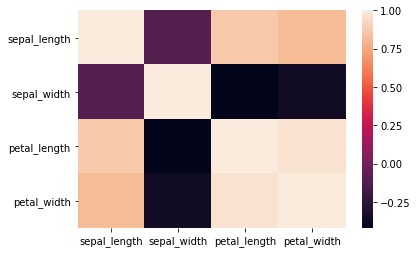

In [15]:
import seaborn as sns
sns.heatmap(iris.corr())

### Finding similar flowers for an Input flower

In [16]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [17]:
from sklearn import preprocessing
numvar=iris.iloc[:,0:4]
numvar.head()
scaler = preprocessing.StandardScaler()
std_numvar = scaler.fit_transform(numvar)
std_numvar=pd.DataFrame(std_numvar)
iris_std=pd.concat([std_numvar, iris.iloc[:,4]], axis=1)
iris_std.columns = col_names
iris_std.head()

,sepal_length,sepal_width,petal_length,petal_width,flower_class
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


In [18]:
#Using Cosine Similarity
def find_closest_cosine(input_flower, iris_df, top_n=10, ignore_idx=None):
  feature_values = iris_df.iloc[:, 0:4]
  similarity_scores = cosine_similarity(input_flower, feature_values)[0]
  top_indices = np.argsort(similarity_scores)[::-1][:top_n + 1]
  if ignore_idx is not None and ignore_idx in top_indices:
    most_similar = iris_df.iloc[top_indices].drop([ignore_idx])
  else:
    most_similar = iris_df.iloc[top_indices[:top_n]]
  return most_similar



In [19]:
#Using Eucledian distance
def find_closest_euclidean(input_flower, iris_df, top_n=10, ignore_idx=None):
  feature_values = iris_df.iloc[:, 0:4]
  distances = euclidean_distances(input_flower, feature_values)[0]
  top_indices = np.argsort(distances)[:top_n + 1]
  if ignore_idx is not None and ignore_idx in top_indices:
    most_similar = iris_df.iloc[top_indices].drop([ignore_idx])
  else:
    most_similar = iris_df.iloc[top_indices[:top_n]]
  return most_similar

In [20]:
input_flower = [[5.936, 2.770, 4.260, 1.326]] #1.sepal_length  2.sepal_width 3.petal_length 4.petal_width
input_flower_std = scaler.transform(input_flower)

We attempt to validate the method. We do it by looking at each individual flower in our data and finding the most similar flower to it.
We then check to see if the flower returned by the method is of the same class as the input flower. If yes, we consider it a correct prediction. We compute the percentage of correct predictions for different distance metrics, and choose the one with the higher percentage. 

In [21]:
# Validation

# Cosine
num_correct = 0
num_total = iris_std.shape[0]
for i in range(num_total):
  input_flower = [iris_std.iloc[i, 0:4]]
  input_flower_class = iris_std.iloc[i, 4]
  closest_flower = find_closest_cosine(input_flower, iris_std, top_n=1, ignore_idx=i)
  closest_flower_class = closest_flower.flower_class.values[0]
  if closest_flower_class == input_flower_class:
    num_correct += 1
print('Cosine similarity: final correct percentage: {:.2f}%'.format(100 * num_correct / num_total))

# Eucledian
num_correct = 0
num_total = iris_std.shape[0]
for i in range(num_total):
  input_flower = [iris_std.iloc[i, 0:4]]
  input_flower_class = iris_std.iloc[i, 4]
  closest_flower = find_closest_euclidean(input_flower, iris_std, top_n=1, ignore_idx=i)
  closest_flower_class = closest_flower.flower_class.values[0]
  if closest_flower_class == input_flower_class:
    num_correct += 1
print('Euclidean distance: final correct percentage: {:.2f}%'.format(100 * num_correct / num_total))

Cosine similarity: final correct percentage: 85.00%
Euclidean distance: final correct percentage: 94.00%


### Output

In [25]:
#Give details of input flower below:

input_flower = [[5.936, 2.770, 4.260, 1.326]] 
#1.sepal_length  2.sepal_width 3.petal_length 4.petal_width

#Press Shift+Enter to get the 10 most similar flowers from historical data 



input_flower_std = scaler.transform(input_flower)
find_closest_euclidean(input_flower_std, iris_std)



,sepal_length,sepal_width,petal_length,petal_width,flower_class
71,0.310998,-0.587764,0.137236,0.133226,Iris-versicolor
99,-0.173674,-0.587764,0.194102,0.133226,Iris-versicolor
55,-0.173674,-0.587764,0.421564,0.133226,Iris-versicolor
82,-0.052506,-0.819166,0.080370,0.001753,Iris-versicolor
73,0.310998,-0.587764,0.535296,0.001753,Iris-versicolor
78,0.189830,-0.356361,0.421564,0.396172,Iris-versicolor
96,-0.173674,-0.356361,0.250967,0.133226,Iris-versicolor
94,-0.294842,-0.819166,0.250967,0.133226,Iris-versicolor
97,0.432165,-0.356361,0.307833,0.133226,Iris-versicolor
63,0.310998,-0.356361,0.535296,0.264699,Iris-versicolor
